# Notebook to Reproduce the Results Demonstrated in the Paper

In the following, we give step by step instructions on how to reproduce the results we presented in the paper.

We show (a) how to train an NN (Sect. 2) using MoGym's API and (b) how to asses the quality of a trained or arbitrary decision agent (Sect. 3 and 4).

This artifact comprises four experiments: *racetrack*, *cdrive*, *elevators* and *firewire*.

For each of the experiments there are two files in the `mogym` directory (same directory as this notebook): `learn_EXPERIMENT.py` and `learn_EXPERIMENT.hermes`.

- The `learn_EXPERIMENT.py` file contains Python code using the MoGym API (in particular the function `create_generic_env`) to construct an Open AI Gym compatible environment. The environment is then used to construct an `Agent` for training (using the `train` method on the constructed `Agent`). The `Agent` we are using here is defined in the [`dqn.py`](./dqn.py) file and implements *Deep Q-Learning*.
- The `learn_EXPERIMENT.hermes` is a configuration file for the reinforcement learning toolkit [RLMate](https://pypi.org/project/rlmate/). This file specifies various parameters such as the structure of the *Neural Network* (NN) that should be used and various other parameters for the experiment. Note that reinforcement learning requires tweaking these so called *hyperparameters*. We have chosen them such that learning actually works well with the respective models. The general structure of the NNs we are using is defined in [`fcn.py`](./fcn.py).

In the following, there are *code cells* for executing *Hermes*—a command line interface provided by RLMate which invokes the `learn_EXPERIMENT.py` scripts with the parameters specified in the respective `learn_EXPERIMENT.hermes` file and stores the *learning artifacts* (i.e., the trained NN, learning curves, et cetera) in the [`experiments`](../experiments/) directory (at the root of the artifact).

The same [`experiments`](../experiments/) directory also contains the neural networks we used for the results in the paper as well as other learning artifacts. When plotting the learning curves these results will be used. To instead plot the learning curves of your own experiments, you need to change the path with which `storage.Experiment.load` is invoked accordingly.

To execute a code cell, press `SHIFT + ENTER` (or use the run button in the toolbar at the top). A number in brackets on the left indicates that the cell is done running. A `*` indicates that the cell is still executing. At the beginning of each section (and of this notebook) there is a cell containing necessary imports and other setup code. Please make sure to execute all the cells in the order they are defined, otherwise imports and other things may be missing. If you want to save time, you can skip the execution of the `hermes` cells for learning.

We provide the output of an execution of the cells on our machine for your convenience.

Here is such a cell. Please execute it:

In [1]:
import pathlib
import rlmate.storage as storage
import rlmate.plot as hplt

# disable some warnings not related to our experiments
import warnings
warnings.simplefilter("ignore")

# 1. Train an NN (Sect. 2 of the paper)

The following commands can be executed in order to learn a neural network for the respective models.

## 1.1. Racetrack

For *Racetrack* we use the Python Package [racetrack](https://pypi.org/project/racetrack/), which provides a configurable JANI model for the racetrack benchmark. 

By executing the following cell, our racetrack experiments are reproduced. 

Note that learning an NN for racetrack takes a considerable amount of RAM and time. Depending on your machine, this might not work for Racetrack. We recommend to use at least 24 GB of RAM. You can skip the next command and instead execute the learning commands for the other models, which are less resource consuming.

Executing the `hermes` command took around 3 1/4 hours on our machine.
Similar experiments for the `cdrive.2` model described below will take less time and resources.

In [2]:
%%time
!hermes exec -f learn_racetrack.hermes -n 'racetrack' --root '../'

[2022-05-06 05:27:07,960] Launching Hermes with experiments path set to ./
[2022-05-06 05:27:07,960] Executing from hermes execution file learn_racetrack.hermes
[2022-05-06 05:27:07,965] Unable to retrieve commit hash for repo head
[2022-05-06 05:27:07,966] Creating job directory /workspace/mogym/../experiments/learn_racetrack/racetrack/2022_05_06_052707962018_0_00000
[2022-05-06 05:27:07,967] Launching job Nr. 0: "python learn_racetrack.py 2022_05_06_052707962018_0_00000 -nnw 15 64 64 9 -nnf fcn -ne 20000 -es 0.05 -ee 0.05 -ed 0.999 -pr 1  -nr -0.2 -pef 1000 -ne 20000 -s 1".
[2022-05-06 05:27:07,968] STDOUT and STDERR will be written to log files.
[2022-05-06 06:07:37,388] Sucessfully finished job Nr. 0 2022_05_06_052707962018_0_00000 in 2429.42 seconds
[2022-05-06 06:07:37,403] Unable to retrieve commit hash for repo head
[2022-05-06 06:07:37,404] Creating job directory /workspace/mogym/../experiments/learn_racetrack/racetrack/2022_05_06_060737399494_1_00000
[2022-05-06 06:07:37,405]

The [`learn_racetrack.hermes`](./learn_racetrack.hermes) file specifies how the job shall be processed: We make use of the neural network defined in [`fcn.py`](./fcn.py) (`-nnf`) using the following structure `15 64 64 9` (`-nnw`) (15 input neurons, 9 output neurons, and two hidden layers of size 64 in between). The exploration coefficient epsilon is in the beginning set to 1 (`-es`) and is exponentially decayed until the value 0.001 (`-ee`) is reached. The training takes 8000 episodes (`-ne`). Further, this file specifies that the script [`learn_racetrack.py`](./learn_racetrack.py) should be used for training. In the latter one can find
- the initialization of the racetrack environment with the MoGym package and its API,
- the initialization of the DQN agent, and
- the actual start of the training.


All of the following experiments work analogously, which is why we don't provide another detailed description for them.

The following code produces and displays the training curve (which is a part of Fig. 3 b) of the paper):

<module 'matplotlib.pyplot' from '/home/vscode/.local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

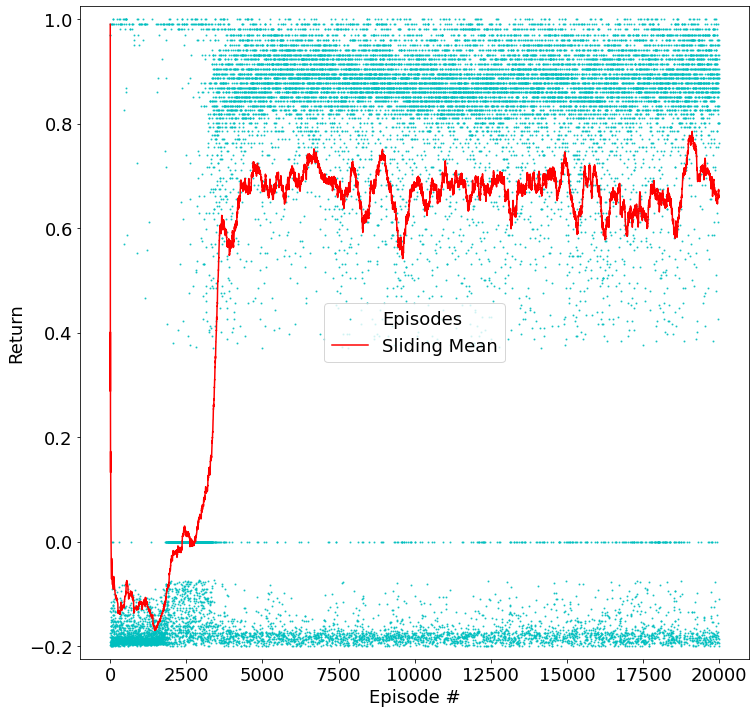

In [3]:
experiment = storage.Experiment.load('../experiments/learn_racetrack/racetrack2/2022_01_20_210439836184_5_fbdf8')
scores = experiment.scores()
hplt.plot_training_progress(scores)

## 1.2. cdrive

For *cdrive* (using the `cdrive.2` QVBS model) execute:

In [4]:
%%time
!hermes exec -f learn_cdrive.hermes -n 'cdrive'  --root '../'

[2022-05-06 08:36:33,211] Launching Hermes with experiments path set to ./
[2022-05-06 08:36:33,211] Executing from hermes execution file learn_cdrive.hermes
[2022-05-06 08:36:33,215] Unable to retrieve commit hash for repo head
[2022-05-06 08:36:33,217] Creating job directory /workspace/mogym/../experiments/learn_cdrive/cdrive/2022_05_06_083633213025_0_00000
[2022-05-06 08:36:33,219] Launching job Nr. 0: "python learn_cdrive.py 2022_05_06_083633213025_0_00000 -nnw 7 64 64 45 -nnf fcn -ed 0.999 -ee 0.05 -es 0.05 -pef 1000 -pr 1 -nr -0.2 -g 0.99 -ne 10000 -s 1".
[2022-05-06 08:36:33,219] STDOUT and STDERR will be written to log files.
[2022-05-06 08:38:05,598] Sucessfully finished job Nr. 0 2022_05_06_083633213025_0_00000 in 92.38 seconds
[2022-05-06 08:38:05,602] Unable to retrieve commit hash for repo head
[2022-05-06 08:38:05,602] Creating job directory /workspace/mogym/../experiments/learn_cdrive/cdrive/2022_05_06_083805600990_1_00000
[2022-05-06 08:38:05,603] Launching job Nr. 1: "

This took about 7 minutes on our machine to complete.

In contrast to *Racetrack*, we load an actual JANI model here using the Momba function `jani.load` (see [learn_cdrive.py](./learn_cdrive.py)).

The following code produces and displays the training curve (which is a part of Fig. 3 a) of the paper):

<module 'matplotlib.pyplot' from '/home/vscode/.local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

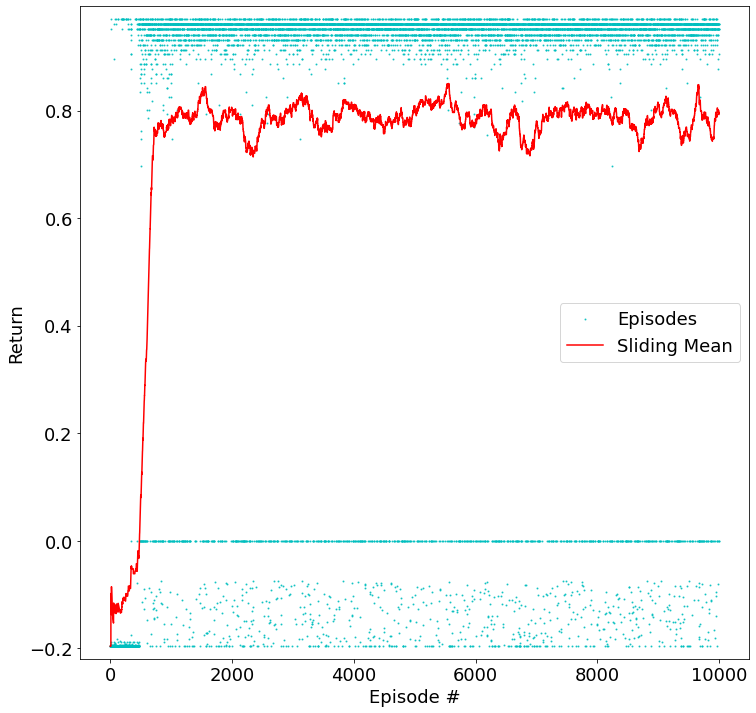

In [5]:
experiment = storage.Experiment.load('../experiments/learn_cdrive/cdrive/2022_01_20_133149959763_0_664e5/')
scores = experiment.scores()
hplt.plot_training_progress(scores)

### 1.3. elevators

Executing the learning script for *elevators* took around 21 minutes on our machine. Three different NNs are trained:

In [6]:
%%time
!hermes exec -f learn_elevators.hermes -n 'elevators' --root '../'

[2022-05-06 08:43:50,942] Launching Hermes with experiments path set to ./
[2022-05-06 08:43:50,943] Executing from hermes execution file learn_elevators.hermes
[2022-05-06 08:43:50,946] Unable to retrieve commit hash for repo head
[2022-05-06 08:43:50,947] Creating job directory /workspace/mogym/../experiments/learn_elevators/elevators/2022_05_06_084350944296_0_00000
[2022-05-06 08:43:50,949] Launching job Nr. 0: "python learn_elevators.py 2022_05_06_084350944296_0_00000 -nnw 22 64 64 41 -nnf fcn -ed 0.99 -ne 8000 -es 1 -ee 0.001 -ed 0.99 -s 0".
[2022-05-06 08:43:50,949] STDOUT and STDERR will be written to log files.
[2022-05-06 08:51:02,769] Sucessfully finished job Nr. 0 2022_05_06_084350944296_0_00000 in 431.82 seconds
[2022-05-06 08:51:02,776] Unable to retrieve commit hash for repo head
[2022-05-06 08:51:02,777] Creating job directory /workspace/mogym/../experiments/learn_elevators/elevators/2022_05_06_085102772990_1_00000
[2022-05-06 08:51:02,778] Launching job Nr. 1: "python l

The following code produces and displays a training curve. You can also switch the experiment number (`2021_11_03_165704354043_c5bb2`) to display another of the experiments. Have a look in the respective experiments directory for additional experiments.

<module 'matplotlib.pyplot' from '/home/vscode/.local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

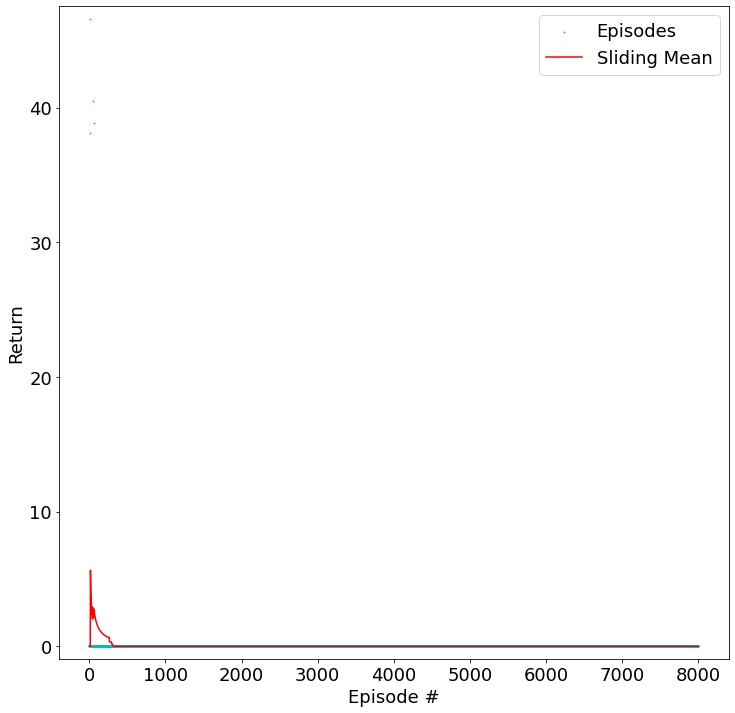

In [7]:
experiment = storage.Experiment.load('../experiments/learn_elevators/elevators/2021_11_03_165704354043_c5bb2/')
scores = experiment.scores()
hplt.plot_training_progress(scores)

### 1.4. firewire_dl

Executing the learning script for *firewire* took around 20 minutes on our machine. Again 3 NNs are trained:

In [8]:
%%time
!hermes exec -f learn_firewire.hermes -n 'firewire' --root '../'

[2022-05-06 09:05:39,850] Launching Hermes with experiments path set to ./
[2022-05-06 09:05:39,850] Executing from hermes execution file learn_firewire.hermes
[2022-05-06 09:05:39,853] Unable to retrieve commit hash for repo head
[2022-05-06 09:05:39,855] Creating job directory /workspace/mogym/../experiments/learn_firewire/firewire/2022_05_06_090539851857_0_00000
[2022-05-06 09:05:39,857] Launching job Nr. 0: "python learn_firewire.py 2022_05_06_090539851857_0_00000 -nnf fcn -nnw 3 64 64 24 -ne 8000 -es 0.05 -ee 0.05 -ed 0.99 -s 0".
[2022-05-06 09:05:39,857] STDOUT and STDERR will be written to log files.
[2022-05-06 09:11:59,358] Sucessfully finished job Nr. 0 2022_05_06_090539851857_0_00000 in 379.50 seconds
[2022-05-06 09:11:59,365] Unable to retrieve commit hash for repo head
[2022-05-06 09:11:59,365] Creating job directory /workspace/mogym/../experiments/learn_firewire/firewire/2022_05_06_091159362023_1_00000
[2022-05-06 09:11:59,367] Launching job Nr. 1: "python learn_firewire.

The following code produces and displays a training curve. You can also switch the experiment number to display another of the experiments. Have a look in the respective experiments directory for additional experiments.

<module 'matplotlib.pyplot' from '/home/vscode/.local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

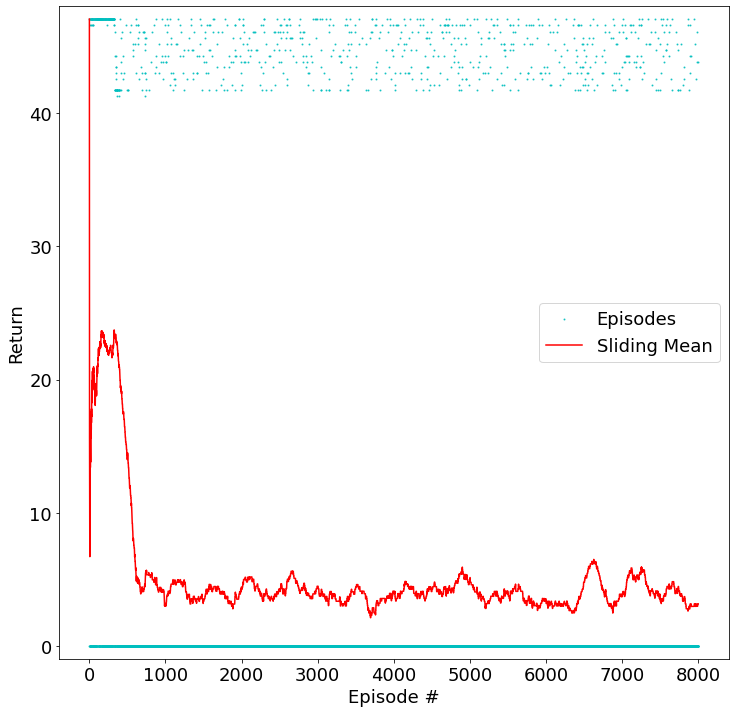

In [9]:
experiment = storage.Experiment.load('../experiments/learn_firewire/firewire/2021_11_03_181436708449_c5bb2/')
scores = experiment.scores()
hplt.plot_training_progress(scores)

# 2. Assessing the Quality of an NN (Sect. 3 and 4 of the paper)

Here we demonstrate how the modified version of the statistical model checker `modes` can be used to asses the quality of a trained agent. To this end, the nondeterminism in the model occurring during statistical model checking is resolved using the NN. We also show how the probabilistic model checker `mcsta` can be invoked on the model using Momba to check the optimal goal probability.

This demonstrates the functions `check_nn` and `check_oracle` (see paper).

Please note, that in the following, `modes` and `mcsta` may need several minutes to calculate the results, i.e., it may take some time until you see the result when executing the cell.

In [10]:
import asyncio
import pathlib

from momba.gym import checker
from momba.tools import modest

from mogym.load_nn import load_nn

# the `mcsta` probabilistic model checker of The Modest Toolset
mcsta = modest.get_checker(accept_license=True)

# the asyncio loop used internally by Jupyter
loop = asyncio.get_event_loop()

# used to load the NNs of multiple episodes
def load_episode_nns(path):
    import re
    
    policies = {}
    for path in EXPERIMENT_PATH.glob("*.json"):
        match = re.search("_([0-9]+).json", path.name)
        if not match:
            continue
        episode = int(match[1])
        policies[episode] = load_nn(path)
    return policies

## 2.1. Racetrack

In [11]:
from mogym import learn_racetrack

EXPERIMENT_PATH = pathlib.Path("../experiments/learn_racetrack/racetrack2/2022_01_20_210439836184_5_fbdf8")

The optimal goal probability of `99.99%` can be checked by invoking the probabilistic model checker `mcsta` on the model. This took less than a minute on our machine.

In [12]:
%%time
optimal_probability = float(mcsta.check(learn_racetrack.network)["goalProbability"])
print(f"Optimal Probability: {optimal_probability}")

Optimal Probability: 0.999955338445111
CPU times: user 36.5 ms, sys: 13.9 ms, total: 50.5 ms
Wall time: 6.14 s


We can also check the goal reachability probability achieved by the NNs extracted after different training episodes.

On our machine this took roughly two hours running four processes in parallel.

Depending on your machine, you may want to run only 2 or 1 processes at the same time. The number can be configured in the following cell. Note that this does increase the time required to run the analysis.

In [13]:
from concurrent import futures

# If you run into any issues (in particular related to memory) please try reduing the number of workers.
pool = futures.ThreadPoolExecutor(max_workers=4)

def analyze_racetrack_episodes(path):
    options = checker.ModesOptions(additional_options=["-C", "0.99"])
    
    def check_nn(item):
        episode, nn = item
        try:
            result = float(checker.check_nn(learn_racetrack.network, learn_racetrack.controlled_instance, nn, options=options)["goalProbability"])
        except Exception as error:
            print("Error:", path, episode)
            print(error)
            raise
        return (episode, result)
        
    return list(pool.map(check_nn, load_episode_nns(path).items()))

In [14]:
%%time
results = analyze_racetrack_episodes(EXPERIMENT_PATH)
print(results)

The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.
The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.
The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.
The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.









model.jani: info: Using default value of 0.01 for the absolute half-width parameter.


model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.

model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 515 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 59.7 s

+ Property goalProbability
  Estimated probability: 0.9589211618257262
  Runs used:             4820
  Run type:              MDP
  Status:                Finished

 

The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 515 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 262.4 s

+ Property goalProbability
  Estimated probability: 0.8678233438485804
  Runs used:             12680
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 515 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 970.6 s

+ Property goalProbability
  Estimated probability: 0.7679646936656283
  Runs used:             19260
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 158 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 201.7 s

+ Property goalProbability
  Estimated probability: 0.9046343975283213
  Runs used:             9710
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 515 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 1625.6 s

+ Property goalProbability
  Estimated probability: 0.7362505978000956
  Runs used:             20910
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 153 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 530.7 s

+ Property goalProbability
  Estimated probability: 0.05519480519480519
  Runs used:             6160
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 154 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 262.6 s

+ Property goalProbability
  Estimated probability: 0.8883363471971067
  Runs used:             11060
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 155 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 2418.5 s

+ Property goalProbability
  Estimated probability: 0.589945652173913
  Runs used:             25760
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 159 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 75.6 s

+ Property goalProbability
  Estimated probability: 0.9722379603399434
  Runs used:             3530
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 155 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 1112.5 s

+ Property goalProbability
  Estimated probability: 0.6456850715746422
  Runs used:             24450
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 154 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 1460.8 s

+ Property goalProbability
  Estimated probability: 0.7610997963340123
  Runs used:             19640
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 155 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 210.4 s

+ Property goalProbability
  Estimated probability: 0.9076109936575053
  Runs used:             9460
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 155 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 305.2 s

+ Property goalProbability
  Estimated probability: 0.9228220858895706
  Runs used:             8150
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 154 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 1274.7 s

+ Property goalProbability
  Estimated probability: 0.059049079754601226
  Runs used:             6520
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 154 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 157.6 s

+ Property goalProbability
  Estimated probability: 0.9098166127292341
  Runs used:             9270
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 154 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 2991.5 s

+ Property goalProbability
  Estimated probability: 0.7498269896193772
  Runs used:             20230
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 156 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 45.9 s

+ Property goalProbability
  Estimated probability: 0.9717877094972067
  Runs used:             3580
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009


Peak memory usage: 154 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 1444.0 s

+ Property goalProbability
  Estimated probability: 0.048555956678700364
  Runs used:             5540
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009


Peak memory usage: 154 MB
Analys

From this, we can extract the maximal goal reachability probability achieved by the extracted neural networks. Note that the result may not be identical to what we reported in the paper on page 10 (97.30%), because we run statistical model checking here, i.e., the results can vary within the confidence interval.

In [15]:
max([prob for _, prob in results])

0.9722379603399434

The combined plot from Figure 3 b) can then be obtained by plotting the goal reachability probability calculated with `modes` for the NNs extracted after different training episodes above and the sliding mean over the training returns logged during training of the NN. Again, the goal probabilities calculated with SMC may vary a little bit.

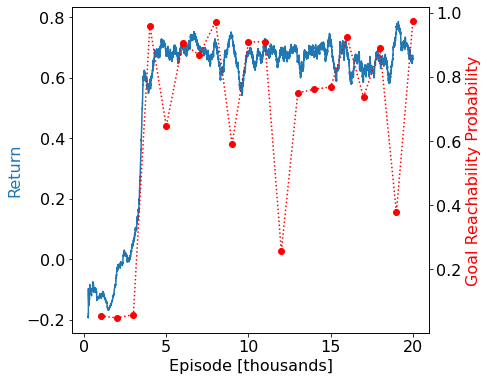

In [16]:
import numpy as np
from matplotlib import pyplot as plt

r = {}
for episode, prob in results:
    r[episode] = prob
    
results = r


# take the grps from the analysis
grps = []
x_grps = []
for episode in sorted(results):
    x_grps.append(int(episode)+1)
    grps.append(results[episode])
x_grps = np.array(x_grps)/1000

# load the scores from experiment
experiment = storage.Experiment.load('../experiments/learn_racetrack/racetrack2/2022_01_20_210439836184_5_fbdf8/')
scores = experiment.scores()

# parameters for sliding mean
max_len = len(scores)
batch_size = 250
# calculate the sliding mean
d = []
sliding_means = []
for i, score in enumerate(scores[batch_size-1:max_len]):
    if i < batch_size:
        d.append(score)
    else:
        d[i%batch_size] = score
    new_value = np.mean(d)
    sliding_means.append(new_value)
    
# plot sliding mean and grp
fontsize = 16
fig, ax1 = plt.subplots(figsize=[6.4, 6])
ax2 = ax1.twinx()

x_means = (np.array(range(len(sliding_means)))+batch_size)/1000
ax1.plot(x_means, sliding_means, label = 'racetrack', color = 'tab:blue')
ax2.plot(x_grps, grps, linestyle = "dotted", color = "red", marker = 'o')

ax1.set_xlabel('Episode [thousands]', fontsize = fontsize)
ax1.set_ylabel('Return', fontsize = fontsize, color = 'tab:blue')
ax1.tick_params(labelsize = fontsize)
ax2.tick_params(labelsize=fontsize)
ax2.set_ylabel("Goal Reachability Probability", fontsize=fontsize, color = "red")

fig.savefig("../racetrack-plot.pdf", bbox_inches="tight")
fig.savefig("../racetrack-plot.png", bbox_inches="tight")

## 2.2. cdrive.2

In [17]:
from mogym import learn_cdrive

In [18]:
EXPERIMENT_PATH = pathlib.Path("../experiments/learn_cdrive/cdrive/2022_01_20_133149959763_0_664e5/")

The optimal goal probability of `86.45%` can be checked by invoking the probabilistic model checker `mcsta` on the model. This took around half a second on our machine.

In [19]:
%%time
optimal_probability = float(mcsta.check(learn_cdrive.network)["goal"])
print(f"Optimal Probability: {optimal_probability}")

Optimal Probability: 0.8645657165326853
CPU times: user 15.4 ms, sys: 16.1 ms, total: 31.6 ms
Wall time: 592 ms


We now analyze the goal reaching probability for cdrive over a subset of the training episodes, which took around one and a half minute on our machine.

In [20]:
def analyze_cdrive_episodes(path):
    options = checker.ModesOptions(additional_options=["-C", "0.99"])

    return {
        episode: float(checker.check_nn(learn_cdrive.network, learn_cdrive.instance, nn, options=options)["goal"])
        for episode, nn in load_episode_nns(path).items()
    }

In [21]:
%%time
results_cdrive = analyze_cdrive_episodes(EXPERIMENT_PATH)

The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: A Momba Model is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 179 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 23.9 s

+ Property goal
  Estimated probability: 0.8075739644970414
  Runs used:             16900
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: A Momba Model is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 175 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 10.5 s

+ Property goal
  Estimated probability: 0.8661202185792349
  Runs used:             12810
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: A Momba Model is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 175 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 5.0 s

+ Property goal
  Estimated probability: 0.8652680652680653
  Runs used:             12870
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: A Momba Model is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 174 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 4.7 s

+ Property goal
  Estimated probability: 0.865990639625585
  Runs used:             12820
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: A Momba Model is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 175 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 4.6 s

+ Property goal
  Estimated probability: 0.8684877276326207
  Runs used:             12630
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: A Momba Model is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 174 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 5.0 s

+ Property goal
  Estimated probability: 0.8611532625189682
  Runs used:             13180
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: A Momba Model is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 174 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 5.1 s

+ Property goal
  Estimated probability: 0.8603018867924528
  Runs used:             13250
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: A Momba Model is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 174 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 4.9 s

+ Property goal
  Estimated probability: 0.8666405638214565
  Runs used:             12770
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: A Momba Model is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 173 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 4.8 s

+ Property goal
  Estimated probability: 0.8645510835913313
  Runs used:             12920
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009



The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.






model.jani:model: info: A Momba Model is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.

Peak memory usage: 175 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 5.1 s

+ Property goal
  Estimated probability: 0.8618431073876618
  Runs used:             13130
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.010000000000000009

CPU times: user 406 ms, sys: 123 ms, total: 529 ms
Wall time: 1min 25s


In [22]:
results_cdrive

{999: 0.8075739644970414,
 1999: 0.8661202185792349,
 6999: 0.8652680652680653,
 2999: 0.865990639625585,
 8999: 0.8684877276326207,
 7999: 0.8611532625189682,
 9999: 0.8603018867924528,
 5999: 0.8666405638214565,
 4999: 0.8645510835913313,
 3999: 0.8618431073876618}

From that the maximal goal reachability probability achieved by the extracted neural networks can be obtained. Again, the result may differ from what we reported on page 9 at the bottom (86.57%) because we perform statistical model checking and the results may vary within the confidence interval.

In [23]:
max(results_cdrive.values())

0.8684877276326207

The combined plot in Figure 3 a) can then again be produced from the intermediate results as above.

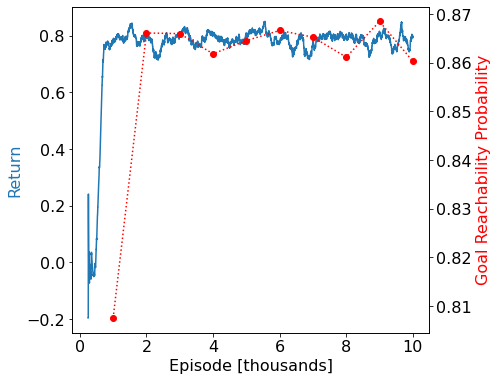

In [24]:
# take the grps from the analysis
results = results_cdrive
grps = []
x_grps = []
for episode in sorted(results_cdrive):
    x_grps.append(episode+1)
    grps.append(results[episode])
x_grps = np.array(x_grps)/1000

# load the scores from experiment
experiment = storage.Experiment.load('../experiments/learn_cdrive/cdrive/2022_01_20_133149959763_0_664e5/')
scores = experiment.scores()

# parameters for sliding mean
max_len = len(scores)
batch_size = 250
# calculate the sliding mean
d = []
sliding_means = []
for i, score in enumerate(scores[batch_size-1:max_len]):
    if i < batch_size:
        d.append(score)
    else:
        d[i%batch_size] = score
    new_value = np.mean(d)
    sliding_means.append(new_value)
    
# plot sliding mean and grp
fontsize = 16
fig, ax1 = plt.subplots(figsize=[6.4, 6])
ax2 = ax1.twinx()

x_means = (np.array(range(len(sliding_means)))+batch_size)/1000
ax1.plot(x_means, sliding_means, label = 'cdrive.2', color = 'tab:blue')
ax2.plot(x_grps, grps, linestyle = "dotted", color = "red", marker = 'o')

ax1.set_xlabel('Episode [thousands]', fontsize = fontsize)
ax1.set_ylabel('Return', fontsize = fontsize, color = 'tab:blue')
ax1.tick_params(labelsize = fontsize)
ax2.tick_params(labelsize=fontsize)
ax2.set_ylabel("Goal Reachability Probability", fontsize=fontsize, color = "red")

fig.savefig("../cdrive-plot.pdf", bbox_inches="tight")
fig.savefig("../cdrive-plot.png", bbox_inches="tight")

# 3. Assessing the Quality of an Arbitrary Decision Agent

In addition to checking the quality of an NN, MoGym also makes it possible to check arbitrary decision agents given as a Python function by connecting it to `modes` to resolve nondeterminism. For demonstration purposes, we here use a very simple decision agent, which always chooses the first applicable action. Clearly, this results in a very bad goal probability of 0. The execution took about 1 minute on our machine, please wait for the output even if the notebook already pretends to be idle.

In [25]:
def oracle(state, available):
    """ This is of course a very dumb driver! """
    return 1

# We use the asynchronous API here for compatibility with Jupyter Lab. As a result, it
# may seem as if the cell has terminated although this is not the case. You will see the
# output of `modes` which indicates the probability.
loop.create_task(checker.check_oracle_async(learn_racetrack.network, learn_racetrack.controlled_instance, oracle))

<Task pending name='Task-4' coro=<check_oracle_async() running at /home/vscode/.local/lib/python3.9/site-packages/momba/gym/checker.py:174>>

Address: localhost:42057





The Modest Toolset (www.modestchecker.net), version v3.1.107-g50c678139.



model.jani:model: info: Featured Racetrack is an MDP model and will be simulated as an MDP.
model.jani: info: Using default value of 0.95 for the confidence parameter.
model.jani: info: Using default value of 0.01 for the absolute half-width parameter.
New connection from ('127.0.0.1', 42998).
Features: 15, Actions: 9

Peak memory usage: 82 MB
Analysis results for model.jani
Status:          Finished
Simulation time: 37.3 s

+ Property goalProbability
  Estimated probability: 0
  Runs used:             490
  Run type:              MDP
  Status:                Finished

  + Error bounds
    Statement: Adaptive: P(error > ε) < δ
    ε:         0.01
    δ:         0.050000000000000044

